In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array((np.ones(100), np.random.rand(100)))
y = np.dot([4,3], X) + np.random.rand(100)

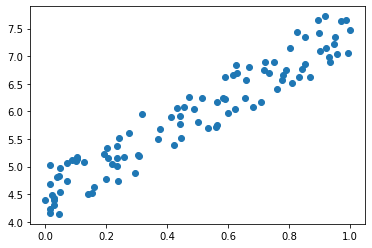

In [3]:
plt.scatter(X[1,:], y)

In [4]:
def gradient(theta, m, X, y):
    grad = 1 / m * (np.dot(theta, X) - y).dot(X.T)
    return grad

In [5]:
def loss_fuction(theta, m, X, y):
    loss = 1 / (2*m) * np.sum(np.square(np.dot(theta, X) - y))
    return loss

In [6]:
def quasi_newton(theta, X, y, iteration):
    
    n = X.shape[0]
    m = len(y)
    
    theta_history = np.zeros((iteration+1, n))
    loss_history = np.zeros(iteration+1)
    Dk_history = np.zeros((iteration+1, n, n))
    
    theta_history[0, :] = theta
    loss_history[0] = loss_fuction(theta, m, X, y)
    Dk_history[0] = np.eye(n)
    
    for i in range(1, iteration+1):
        
        grad = gradient(theta, m, X, y)
        Dk = Dk_history[i-1]
        theta_prev = theta_history[i-1]
        
        theta = theta_prev - grad.dot(Dk)
        loss = loss_fuction(theta, m, X, y)
        sk = theta - theta_prev
        yk = gradient(theta, m, X, y) - gradient(theta_prev, m, X, y)
        Dk_delta = (np.dot(sk, sk.T) / np.dot(sk.T, yk)) - (np.dot(Dk, yk).dot(np.dot(yk.T,Dk.T)) / np.dot(yk.T, Dk).dot(yk)) 
        Dk_next = Dk + Dk_delta
        
        theta_history[i, :] = theta
        loss_history[i] = loss
        Dk_history[i, :, :] = Dk_next
        
        print('Iteration:{}'.format(i))
        print('theta:{}'.format(theta))
        print('loss:{}'.format(loss))
        
    return theta_history, loss_history, Dk_history

In [7]:
iterations = 5
theta_init = np.random.random(2)

In [8]:
theta_init

array([0.86152352, 0.69133921])

In [9]:
theta_history, loss_history, Dk_history = quasi_newton(theta_init, X, y, iterations)

Iteration:1
theta:[5.56759939 3.16100952]
loss:0.7363960023085886
Iteration:2
theta:[4.73954587 2.92653179]
loss:0.06976638255809729
Iteration:3
theta:[4.51303551 2.82529776]
loss:0.04308762873704094
Iteration:4
theta:[4.5393475  2.84328812]
loss:0.04218279005257679
Iteration:5
theta:[4.54154027 2.85360164]
loss:0.04209185940135364


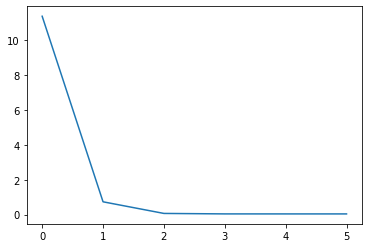

In [10]:
plt.plot(loss_history)

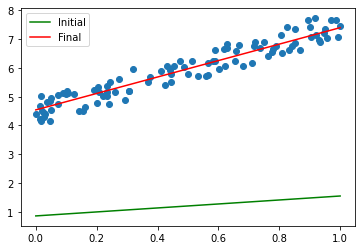

In [11]:
plt.scatter(X[1,:], y)

x = np.linspace(0, 1, 11)

plt.plot(x, theta_history[0, 0] + theta_history[0, 1] * x, c='g', label = 'Initial')
plt.plot(x, theta_history[iterations, 0] + theta_history[iterations, 1] * x, c='r', label = 'Final')
plt.legend()